In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import random
from termcolor import colored
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import LinearSVC

# gensim & nltk
from gensim.models import Word2Vec, FastText
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

c:\Users\moham\anaconda3\envs\depi\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* `Load Dataset`

In [2]:
# Load dataset
data = fetch_20newsgroups(subset='test', remove=['headers', 'footers', 'quotes'],
                         categories=['rec.autos', 'comp.windows.x', 
                                     'soc.religion.christian', 'rec.sport.baseball'])

# Split to X & y
X = data.data
y = [data.target_names[i] for i in data.target]

# Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

* `Tokenization`

In [3]:
# Function to preprocess and tokenize text
def preprocess_text(text: str):
    # Lowercase and tokenize
    tokens = word_tokenize(text.lower())
    # Remove punctuation and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

# Preprocess and tokenize the training data
X_train_tokenized = [preprocess_text(doc) for doc in tqdm(X_train, desc='Tokenizing')]

Tokenizing: 100%|██████████| 1268/1268 [01:44<00:00, 12.11it/s]


* `Word2Vec Model (CBOW & Skip-gram)`

In [4]:
# Embedding size
EMBED_SIZE = 100

In [5]:
# Word2Vec Model
model_w2v = Word2Vec(sentences=X_train_tokenized,
                    vector_size=EMBED_SIZE,
                    window=5,                   # context window size
                    min_count=2,                # ingore non frequent words
                    sg=1,                       # 1 for skip-gram, 0 for CBOW
                    hs=0,                       # Use hierarchical softmax or not (1, 0)
                    negative=10,                # for negative sampling cases
                    workers=2,                  # No.of cores of CPU
                    seed=45,                    # SEED
                    epochs=10)                    

In [6]:
# Vocab size
len(model_w2v.wv)

8639

In [7]:
# Transform the text data to Word2Vec embeddings
def text_to_w2v(text, model):

    # Call the preprocessing function
    tokens = preprocess_text(text)

    # Get the emeddings
    embeddings = [model.wv[word] for word in tokens if word in model.wv]
    
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)

# Apply
X_train_w2v = [text_to_w2v(doc, model_w2v) for doc in tqdm(X_train, desc='Embedding Training Data')]
X_test_w2v = [text_to_w2v(doc, model_w2v) for doc in tqdm(X_test, desc='Embedding Testing Data')]

Embedding Testing Data: 100%|██████████| 318/318 [00:28<00:00, 11.04it/s]


In [8]:
# Word2vec representation
model_w2v.wv['great']

array([-2.96976358e-01, -1.83910266e-01, -5.81798069e-02, -3.72413814e-01,
       -5.37684467e-03,  4.76369895e-02, -9.67183337e-02,  2.85231262e-01,
        5.50307095e-01, -6.44107535e-02, -1.19975813e-01,  5.62487021e-02,
       -4.68832552e-01,  1.05892301e-01,  8.97400901e-02, -2.25572765e-01,
        1.25721797e-01, -4.20858562e-02,  2.79403239e-01, -2.04322353e-01,
       -1.00547791e-01,  1.62666619e-01,  1.03526711e-01, -2.88726866e-01,
       -2.36336812e-01, -6.04069084e-02, -2.57350147e-01, -4.37022410e-02,
        1.96530178e-01, -5.61841540e-02,  3.58306706e-01, -6.34918511e-02,
        1.07288994e-01,  1.07942499e-01, -8.30496997e-02,  3.34764004e-01,
       -4.11347896e-02, -1.68140277e-01, -5.54968297e-01,  1.71634495e-01,
        1.22878760e-01, -2.62606680e-01,  7.03795403e-02,  7.64217228e-02,
        6.74674809e-02, -3.65477681e-01,  2.46747509e-01,  8.15330967e-02,
        2.16412470e-02, -2.16225743e-01,  1.19947694e-01,  2.17787683e-01,
        3.95508826e-01, -

In [9]:
# Key to index
model_w2v.wv.key_to_index

{'x': 0,
 'would': 1,
 'one': 2,
 'god': 3,
 'also': 4,
 'like': 5,
 'know': 6,
 'get': 7,
 'think': 8,
 'use': 9,
 'people': 10,
 'time': 11,
 'see': 12,
 'could': 13,
 'may': 14,
 'even': 15,
 'way': 16,
 'new': 17,
 'car': 18,
 'good': 19,
 'first': 20,
 'say': 21,
 'make': 22,
 'well': 23,
 'us': 24,
 'many': 25,
 'believe': 26,
 'much': 27,
 'since': 28,
 'two': 29,
 'christ': 30,
 'want': 31,
 'church': 32,
 'problem': 33,
 'year': 34,
 'system': 35,
 'used': 36,
 'anyone': 37,
 'look': 38,
 'find': 39,
 'still': 40,
 'right': 41,
 'sin': 42,
 'last': 43,
 'really': 44,
 'version': 45,
 'window': 46,
 'need': 47,
 'windows': 48,
 'might': 49,
 'file': 50,
 'using': 51,
 'game': 52,
 'better': 53,
 'things': 54,
 'homosexuality': 55,
 'paul': 56,
 'without': 57,
 'run': 58,
 'point': 59,
 'work': 60,
 'must': 61,
 'server': 62,
 'seems': 63,
 'help': 64,
 'jesus': 65,
 'another': 66,
 'go': 67,
 'openwindows': 68,
 'something': 69,
 'subject': 70,
 'display': 71,
 'back': 72,
 'wo

In [10]:
# Find similar words to the given word
sim_words_w2v = model_w2v.wv.most_similar('baseball', topn=10)
sim_words_w2v

[('fanatic', 0.8868075013160706),
 ('watching', 0.8677850961685181),
 ('watch', 0.8660814762115479),
 ('steph', 0.8648998141288757),
 ('stephenson', 0.8496230244636536),
 ('winning', 0.8469880223274231),
 ('umpires', 0.8382498621940613),
 ('guys', 0.8372448086738586),
 ('guy', 0.8296526074409485),
 ('team', 0.8286444544792175)]

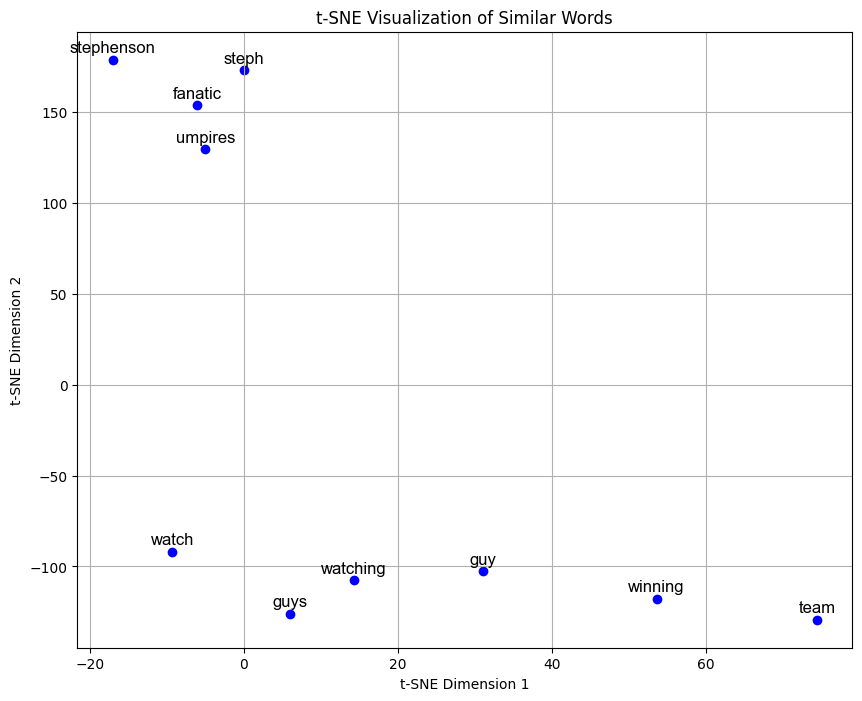

In [11]:
# Visualizing the most similar words using t-sne and sactterplot
# Get vectors and words
words = [word for word, _ in sim_words_w2v]
word_vectors = [model_w2v.wv[word] for word in words]
word_vectors = np.array(word_vectors)


# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=2, init='pca', random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o', c='b')

# Annotate points with word labels
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12, textcoords='offset points', 
                 xytext=(0,5), ha='center', fontproperties='Arial', family='Arial')
    

plt.title(f"t-SNE Visualization of Similar Words")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

In [12]:
# Odd-One-Out
lst_exmaple = ['ball', 'ground', 'car']
model_w2v.wv.doesnt_match(lst_exmaple)

'car'

In [13]:
# Analogy
model_w2v.wv.most_similar(positive=['baseball', 'ground'], negative =['player'])

[('listen', 0.8719175457954407),
 ('chose', 0.8663157820701599),
 ('deserve', 0.8658440709114075),
 ('friends', 0.8645946383476257),
 ('implication', 0.8640793561935425),
 ('grow', 0.8620049953460693),
 ('honest', 0.8617147207260132),
 ('rocks', 0.8614575266838074),
 ('treat', 0.8606058955192566),
 ('bound', 0.8599177002906799)]

* `1. Train a classifier`

In [14]:
# Linear SVC
clf = LinearSVC()
clf.fit(X_train_w2v, y_train)

y_pred_test = clf.predict(X_test_w2v)

In [15]:
# Report
print(classification_report(y_test, y_pred_test))

                        precision    recall  f1-score   support

        comp.windows.x       0.94      0.91      0.92        79
             rec.autos       0.84      0.86      0.85        79
    rec.sport.baseball       0.92      0.89      0.90        80
soc.religion.christian       0.92      0.95      0.93        80

              accuracy                           0.90       318
             macro avg       0.90      0.90      0.90       318
          weighted avg       0.90      0.90      0.90       318



In [16]:
accuracy_score(y_test, y_pred_test) # of a classifier

0.9025157232704403

* `2. Using Cosine Similarity Get Top Similar (as we did before)`

In [17]:
for i in random.choices(range(0, len(X_test)), k=5):
    print(f"ID: {i}")
    print("True label:", colored(y_test[i], 'green'))
    distances = cosine_similarity(X_test_w2v[i].reshape(1, EMBED_SIZE), X_train_w2v).flatten()
    indices = np.argsort(distances)[::-1]
    for _, j in enumerate(indices[:3]):
        print(f"{_} nearest label is {colored(y_train[j], 'green' if y_train[j]==y_test[i] else 'red')}",
             f"similarity: {colored(round(distances[j], 3), 'yellow')}")

ID: 263
True label: rec.autos
0 nearest label is rec.autos similarity: 0.994
1 nearest label is rec.autos similarity: 0.993
2 nearest label is rec.autos similarity: 0.99
ID: 277
True label: soc.religion.christian
0 nearest label is soc.religion.christian similarity: 0.995
1 nearest label is soc.religion.christian similarity: 0.995
2 nearest label is soc.religion.christian similarity: 0.994
ID: 265
True label: soc.religion.christian
0 nearest label is soc.religion.christian similarity: 0.995
1 nearest label is soc.religion.christian similarity: 0.995
2 nearest label is soc.religion.christian similarity: 0.994
ID: 169
True label: soc.religion.christian
0 nearest label is soc.religion.christian similarity: 0.995
1 nearest label is soc.religion.christian similarity: 0.993
2 nearest label is soc.religion.christian similarity: 0.992
ID: 117
True label: comp.windows.x
0 nearest label is rec.sport.baseball similarity: 0.927
1 nearest label is comp.windows.x similarity: 0.92
2 nearest label is 

In [18]:
# List to append in it the predicted of test labels
y_pred_test = []

# Loop over the entire test dataset
for i in range(len(X_test)):
    # Compute cosine similarity between the test instance and all training instances
    distances = cosine_similarity(X_test_w2v[i].reshape(1, EMBED_SIZE), X_train_w2v).flatten()
    # Get the indices of the training instances sorted by similarity in descending order
    indices = np.argsort(distances)[::-1]
    # Get the labels of the three nearest neighbors
    nearest_labels = [y_train[j] for j in indices[:3]]
    # Determine the most common label among the three nearest neighbors
    y_pred_each = Counter(nearest_labels).most_common(1)[0][0]
    # Append to list
    y_pred_test.append(y_pred_each)

# Get Accuracy score
acc = accuracy_score(y_test, y_pred_test)
print(f'Acccuray Score using cosine simlarity is: {acc*100:.3f} %') # using cosine similarity as a metric

Acccuray Score using cosine simlarity is: 88.050 %


---

* `3. Using Euclidean Distance for measuring similarity`

In [19]:
for i in random.choices(range(0, len(X_test)), k=5):
    print(f"ID: {i}")
    print("True label:", colored(y_test[i], 'green'))
    distances = euclidean_distances(X_test_w2v[i].reshape(1, EMBED_SIZE), X_train_w2v).flatten() 
    indices = np.argsort(distances)
    for _, j in enumerate(indices[:3]):
        print(f"{_} nearest label is {colored(y_train[j], 'green' if y_train[j]==y_test[i] else 'red')}",
             f"similarity: {colored(round(distances[j], 3), 'yellow')}")

ID: 187
True label: comp.windows.x
0 nearest label is comp.windows.x similarity: 0.0
1 nearest label is comp.windows.x similarity: 0.0
2 nearest label is comp.windows.x similarity: 0.536
ID: 295
True label: soc.religion.christian
0 nearest label is soc.religion.christian similarity: 0.254
1 nearest label is soc.religion.christian similarity: 0.266
2 nearest label is soc.religion.christian similarity: 0.275
ID: 42
True label: soc.religion.christian
0 nearest label is soc.religion.christian similarity: 0.358
1 nearest label is soc.religion.christian similarity: 0.4
2 nearest label is soc.religion.christian similarity: 0.416
ID: 214
True label: soc.religion.christian
0 nearest label is soc.religion.christian similarity: 0.155
1 nearest label is soc.religion.christian similarity: 0.197
2 nearest label is soc.religion.christian similarity: 0.2
ID: 114
True label: soc.religion.christian
0 nearest label is soc.religion.christian similarity: 0.155
1 nearest label is soc.religion.christian simi

In [20]:
# List to append in it the predicted of test labels
y_pred_test = []

# Loop over the entire test dataset
for i in range(len(X_test)):
  
    # Compute euclidean_distances between the test instance and all training instances
    distances = euclidean_distances(X_test_w2v[i].reshape(1, EMBED_SIZE), X_train_w2v).flatten() 
    # Get the indices of the training instances sorted by distance in ascending order
    indices = np.argsort(distances)
    # Get the labels of the three nearest neighbors
    nearest_labels = [y_train[j] for j in indices[:3]]
    # Determine the most common label among the three nearest neighbors
    y_pred_each = Counter(nearest_labels).most_common(1)[0][0]
    # Append to list
    y_pred_test.append(y_pred_each)

# Get Accuracy score
acc = accuracy_score(y_test, y_pred_test)
print(f'Acccuray Score using Euclidean Distance is: {acc*100:.3f} %') # usign euclidean distance

Acccuray Score using Euclidean Distance is: 88.994 %


-------
-------

* `FastText Model`

In [21]:
# Initialize the FastText model
model_fasttext = FastText(sentences=X_train_tokenized,
                        vector_size=EMBED_SIZE,  
                        window=5,                          # Context window size
                        min_count=2,                       #  ignore non frequent words
                        sg=1,                              # Use Skip-Gram model; 0 for CBOW
                        hs=0,                              # Use hierarchical softmax or not (1, 0)
                        negative=10,                       # Number of noise words for Negative Sampling
                        workers=2,                         # No.of cores of CPU
                        seed=34,                           # seed
                        epochs=10,
                        min_n=3, max_n=6)                  # ngram for example (3, 6)

In [22]:
# Vocab size
len(model_fasttext.wv)

8639

In [23]:
# Transform the text data to FastText embeddings
def text_to_fasttext(text, model):

    # Call the preprocessing function
    tokens = preprocess_text(text)

    # Get the emeddings
    embeddings = [model.wv[word] for word in tokens if word in model.wv]
    
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)


# Apply
X_train_fasttext = [text_to_fasttext(doc, model_fasttext) for doc in tqdm(X_train, desc='Embedding Training Data')]
X_test_fasttext = [text_to_fasttext(doc, model_fasttext) for doc in tqdm(X_test, desc='Embedding Testing Data')]

Embedding Testing Data: 100%|██████████| 318/318 [00:24<00:00, 12.93it/s]


In [24]:
# FastText representation
model_fasttext.wv['great']

array([ 0.40430456,  0.09063291, -0.0494538 ,  0.09103452, -0.04308681,
        0.18163417, -0.45083815, -0.3473161 , -0.00407171,  0.23051019,
        0.44063476,  0.20080917, -0.18046255, -0.7819177 , -0.56424904,
       -0.10163131, -0.30864534, -0.12249482, -0.10048462, -0.21704414,
        0.48061797, -0.16399609, -0.42451012,  0.4600305 ,  0.12943114,
       -0.19952522,  0.2662985 ,  0.3548642 , -0.51804155, -0.5106996 ,
        0.27229634, -0.42140353,  0.02824701, -0.16483727, -0.1561437 ,
        0.29953355,  0.1865765 ,  0.07610759, -0.0285605 ,  0.10808595,
       -0.51086   ,  0.7500525 ,  0.24141152, -0.48140445, -0.08104943,
        0.37631497, -0.09916303, -0.33822292, -0.06674159,  0.6965487 ,
        0.14697367,  0.13737682, -0.04476205,  0.0098921 , -0.22170736,
       -0.17630728,  0.11582791, -0.19386467, -0.1307971 ,  0.45012438,
       -0.29828975, -0.18465331, -0.41012037,  0.21771751,  0.34835318,
        0.32389364,  0.25460574, -0.08641935, -0.13668066, -0.14

In [25]:
# Key to index
model_fasttext.wv.key_to_index

{'x': 0,
 'would': 1,
 'one': 2,
 'god': 3,
 'also': 4,
 'like': 5,
 'know': 6,
 'get': 7,
 'think': 8,
 'use': 9,
 'people': 10,
 'time': 11,
 'see': 12,
 'could': 13,
 'may': 14,
 'even': 15,
 'way': 16,
 'new': 17,
 'car': 18,
 'good': 19,
 'first': 20,
 'say': 21,
 'make': 22,
 'well': 23,
 'us': 24,
 'many': 25,
 'believe': 26,
 'much': 27,
 'since': 28,
 'two': 29,
 'christ': 30,
 'want': 31,
 'church': 32,
 'problem': 33,
 'year': 34,
 'system': 35,
 'used': 36,
 'anyone': 37,
 'look': 38,
 'find': 39,
 'still': 40,
 'right': 41,
 'sin': 42,
 'last': 43,
 'really': 44,
 'version': 45,
 'window': 46,
 'need': 47,
 'windows': 48,
 'might': 49,
 'file': 50,
 'using': 51,
 'game': 52,
 'better': 53,
 'things': 54,
 'homosexuality': 55,
 'paul': 56,
 'without': 57,
 'run': 58,
 'point': 59,
 'work': 60,
 'must': 61,
 'server': 62,
 'seems': 63,
 'help': 64,
 'jesus': 65,
 'another': 66,
 'go': 67,
 'openwindows': 68,
 'something': 69,
 'subject': 70,
 'display': 71,
 'back': 72,
 'wo

In [26]:
# Find similar words to the given word
sim_words_fasttext = model_fasttext.wv.most_similar('baseball', topn=10)
sim_words_fasttext

[('ball', 0.9764723777770996),
 ('balls', 0.9691969156265259),
 ('umpire', 0.9671515226364136),
 ('fastball', 0.9628387093544006),
 ('basketball', 0.9616622924804688),
 ('balk', 0.9607110619544983),
 ('ballplayer', 0.9590593576431274),
 ('gumball', 0.9566890597343445),
 ('football', 0.9566071629524231),
 ('ballplayers', 0.9557005763053894)]

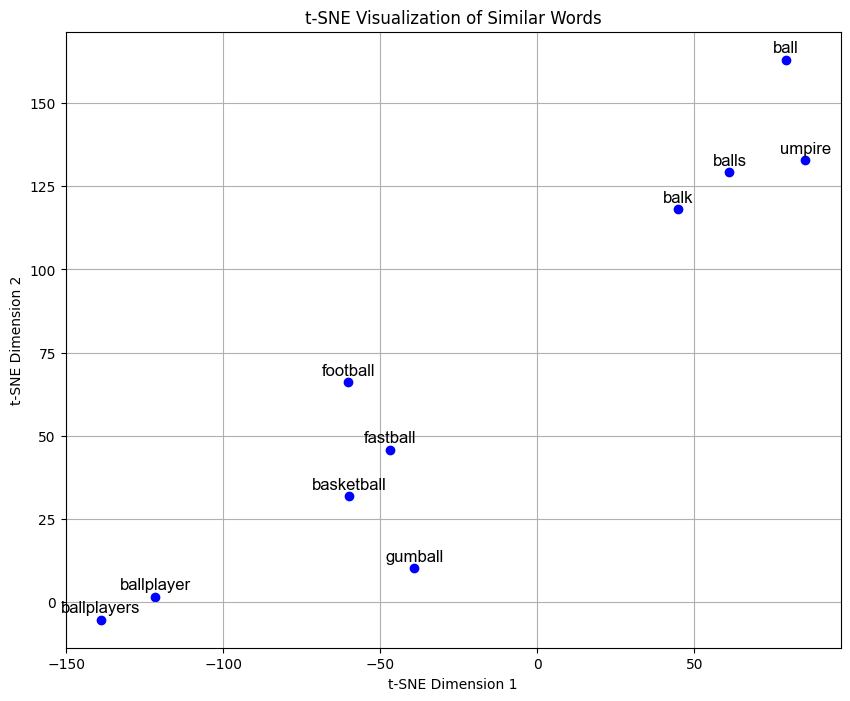

In [27]:
# Visualizing the most similar words using t-sne and sactterplot
# Get vectors and words
words = [word for word, _ in sim_words_fasttext]
word_vectors = [model_fasttext.wv[word] for word in words]
word_vectors = np.array(word_vectors)


# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=2, init='pca', random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o', c='b')

# Annotate points with word labels
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12, textcoords='offset points', 
                 xytext=(0,5), ha='center', fontproperties='Arial', family='Arial')
    

plt.title(f"t-SNE Visualization of Similar Words")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

In [28]:
# Odd-One-Out
lst_exmaple = ['ball', 'ground', 'car']
model_fasttext.wv.doesnt_match(lst_exmaple)

'car'

In [29]:
# Analogy
model_fasttext.wv.most_similar(positive=['baseball', 'ground'], negative =['player'])

[('friend', 0.9444302916526794),
 ('talk', 0.9298024773597717),
 ('grounds', 0.9284116625785828),
 ('blind', 0.9267710447311401),
 ('tend', 0.9265632033348083),
 ('strongest', 0.9208754897117615),
 ('abound', 0.9189667105674744),
 ('remind', 0.9184433221817017),
 ('girlfriend', 0.9178948402404785),
 ('body', 0.9171612858772278)]

* `1. Train a classifier`

In [30]:
# Linear SVC
clf = LinearSVC()
clf.fit(X_train_fasttext, y_train)

y_pred_test = clf.predict(X_test_fasttext)

In [31]:
# Report
print(classification_report(y_test, y_pred_test))

                        precision    recall  f1-score   support

        comp.windows.x       0.93      0.90      0.92        79
             rec.autos       0.84      0.84      0.84        79
    rec.sport.baseball       0.91      0.88      0.89        80
soc.religion.christian       0.88      0.95      0.92        80

              accuracy                           0.89       318
             macro avg       0.89      0.89      0.89       318
          weighted avg       0.89      0.89      0.89       318



In [32]:
accuracy_score(y_test, y_pred_test) # of a classifier

0.889937106918239

* `2. Using Cosine Similarity Get Top Similar (as we did before)`

In [33]:
for i in random.choices(range(0, len(X_test)), k=5):
    print(f"ID: {i}")
    print("True label:", colored(y_test[i], 'green'))
    distances = cosine_similarity(X_test_fasttext[i].reshape(1, EMBED_SIZE), X_train_fasttext).flatten()
    indices = np.argsort(distances)[::-1]
    for _, j in enumerate(indices[:3]):
        print(f"{_} nearest label is {colored(y_train[j], 'green' if y_train[j]==y_test[i] else 'red')}",
             f"similarity: {colored(round(distances[j], 3), 'yellow')}")

ID: 215
True label: soc.religion.christian
0 nearest label is soc.religion.christian similarity: 0.997
1 nearest label is soc.religion.christian similarity: 0.995
2 nearest label is soc.religion.christian similarity: 0.995
ID: 254
True label: rec.sport.baseball
0 nearest label is rec.sport.baseball similarity: 0.993
1 nearest label is rec.sport.baseball similarity: 0.989
2 nearest label is rec.sport.baseball similarity: 0.987
ID: 101
True label: rec.autos
0 nearest label is rec.autos similarity: 0.997
1 nearest label is rec.autos similarity: 0.997
2 nearest label is rec.autos similarity: 0.996
ID: 170
True label: comp.windows.x
0 nearest label is comp.windows.x similarity: 0.985
1 nearest label is comp.windows.x similarity: 0.985
2 nearest label is comp.windows.x similarity: 0.985
ID: 222
True label: rec.autos
0 nearest label is rec.autos similarity: 0.988
1 nearest label is rec.autos similarity: 0.985
2 nearest label is rec.autos similarity: 0.984


In [34]:
# List to append in it the predicted of test labels
y_pred_test = []

# Loop over the entire test dataset
for i in range(len(X_test)):
    # Compute cosine similarity between the test instance and all training instances
    distances = cosine_similarity(X_test_fasttext[i].reshape(1, EMBED_SIZE), X_train_fasttext).flatten()
    # Get the indices of the training instances sorted by similarity in descending order
    indices = np.argsort(distances)[::-1]
    # Get the labels of the three nearest neighbors
    nearest_labels = [y_train[j] for j in indices[:3]]
    # Determine the most common label among the three nearest neighbors
    y_pred_each = Counter(nearest_labels).most_common(1)[0][0]
    # Append to list
    y_pred_test.append(y_pred_each)

# Get Accuracy score
acc = accuracy_score(y_test, y_pred_test)
print(f'Acccuray Score using cosine simlarity is: {acc*100:.3f} %') # using cosine similarity as a metric

Acccuray Score using cosine simlarity is: 88.994 %


---

* `3. Using Euclidean Distance for measuring similarity`

In [35]:
for i in random.choices(range(0, len(X_test)), k=5):
    print(f"ID: {i}")
    print("True label:", colored(y_test[i], 'green'))
    distances = euclidean_distances(X_test_fasttext[i].reshape(1, EMBED_SIZE), X_train_fasttext).flatten() 
    indices = np.argsort(distances)
    for _, j in enumerate(indices[:3]):
        print(f"{_} nearest label is {colored(y_train[j], 'green' if y_train[j]==y_test[i] else 'red')}",
             f"similarity: {colored(round(distances[j], 3), 'yellow')}")

ID: 166
True label: comp.windows.x
0 nearest label is comp.windows.x similarity: 0.559
1 nearest label is comp.windows.x similarity: 0.626
2 nearest label is comp.windows.x similarity: 0.628
ID: 46
True label: comp.windows.x
0 nearest label is comp.windows.x similarity: 0.141
1 nearest label is comp.windows.x similarity: 0.318
2 nearest label is comp.windows.x similarity: 0.337
ID: 124
True label: rec.autos
0 nearest label is rec.autos similarity: 0.516
1 nearest label is rec.autos similarity: 0.528
2 nearest label is rec.autos similarity: 0.53
ID: 18
True label: rec.sport.baseball
0 nearest label is rec.sport.baseball similarity: 0.285
1 nearest label is rec.sport.baseball similarity: 0.289
2 nearest label is rec.sport.baseball similarity: 0.301
ID: 262
True label: comp.windows.x
0 nearest label is comp.windows.x similarity: 0.393
1 nearest label is comp.windows.x similarity: 0.413
2 nearest label is rec.autos similarity: 0.422


In [36]:
# List to append in it the predicted of test labels
y_pred_test = []

# Loop over the entire test dataset
for i in range(len(X_test)):
  
    # Compute euclidean_distances between the test instance and all training instances
    distances = euclidean_distances(X_test_fasttext[i].reshape(1, EMBED_SIZE), X_train_fasttext).flatten() 
    # Get the indices of the training instances sorted by distance in ascending order
    indices = np.argsort(distances)
    # Get the labels of the three nearest neighbors
    nearest_labels = [y_train[j] for j in indices[:3]]
    # Determine the most common label among the three nearest neighbors
    y_pred_each = Counter(nearest_labels).most_common(1)[0][0]
    # Append to list
    y_pred_test.append(y_pred_each)

# Get Accuracy score
acc = accuracy_score(y_test, y_pred_test)
print(f'Acccuray Score using Euclidean Distance is: {acc*100:.3f} %') # usign euclidean distance

Acccuray Score using Euclidean Distance is: 88.365 %


-----
-----

* `Doc2Vec Model`

> Designed to represent documents as vectors; Doc2Vec extends the Word2Vec framework to handle larger blocks of text, such as sentences, paragraphs, and documents.

In [37]:
# Label the documents
tagged_data = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(X_train_tokenized)]
tagged_data[-1]

TaggedDocument(words=['whitsebd', 'bryan', 'whitsell', 'sent', 'list', 'verses', 'felt', 'condemn', 'homosexuality', 'mls', 'michael', 'siemon', 'wrote', 'response', 'verses', 'used', 'us', 'incredibly', 'perverse', 'interpretations', 'others', 'simply', 'address', 'issues', 'remainder', 'post', 'deleted', 'moderator', 'made', 'comments', 'would', 'like', 'address', 'referring', 'terms', 'effeminate', 'homosexuals', 'passage', 'agree', 'accuracy', 'translation', 'challenged', 'however', 'simply', 'commenting', 'charge', 'incredibly', 'perverse', 'interpretation', 'read', 'condemnation', 'homosexuality', 'charge', 'seems', 'imply', 'reasonable', 'person', 'would', 'ever', 'conclude', 'verse', 'paul', 'intended', 'condemn', 'homosexuality', 'however', 'think', 'see', 'reasonable', 'person', 'might', 'well', 'take', 'view', 'verse', 'therefore', 'believe', 'incredibly', 'perverse', 'read', 'way', 'actually', 'thinking', 'church', 'couple', 'married', 'minister', 'secular', 'justice', 'pea

In [38]:
# Doc2Vec Model
model_doc2vec = Doc2Vec(documents=tagged_data,
                        dm=0,                     # Distributed Memory (DM)  inspired by CBOW
                        dbow_words=1,             # Distributed Bag-of-Words (DBOW) inspirred skip-gram
                        vector_size=EMBED_SIZE, 
                        window=5, 
                        min_count=10, 
                        epochs=10, 
                        workers=4,
                        seed=42)

In [39]:
# Transform the text data to Word2Vec embeddings
def infer_vector(text, model):

    # Call the preprocessing function
    tokens = preprocess_text(text)
    
    # Get the emeddings
    embeddings = model.infer_vector(tokens)
    return embeddings

# Apply
X_train_doc2vec = [infer_vector(doc, model_doc2vec) for doc in tqdm(X_train, desc='Embedding Training Data')]
X_test_doc2vec = [infer_vector(doc, model_doc2vec) for doc in tqdm(X_test, desc='Embedding Testing Data')]

Embedding Testing Data: 100%|██████████| 318/318 [00:21<00:00, 14.51it/s]


In [40]:
# Find similar words to the given word
sim_words_doc2vec = model_doc2vec.wv.most_similar('baseball', topn=10)
sim_words_doc2vec

[('winning', 0.8467444777488708),
 ('football', 0.8462029695510864),
 ('umpires', 0.8447139859199524),
 ('watching', 0.8422802686691284),
 ('watch', 0.830696702003479),
 ('guy', 0.8276911377906799),
 ('boggs', 0.8237228393554688),
 ('roger', 0.8208112120628357),
 ('team', 0.8074060082435608),
 ('season', 0.8065154552459717)]

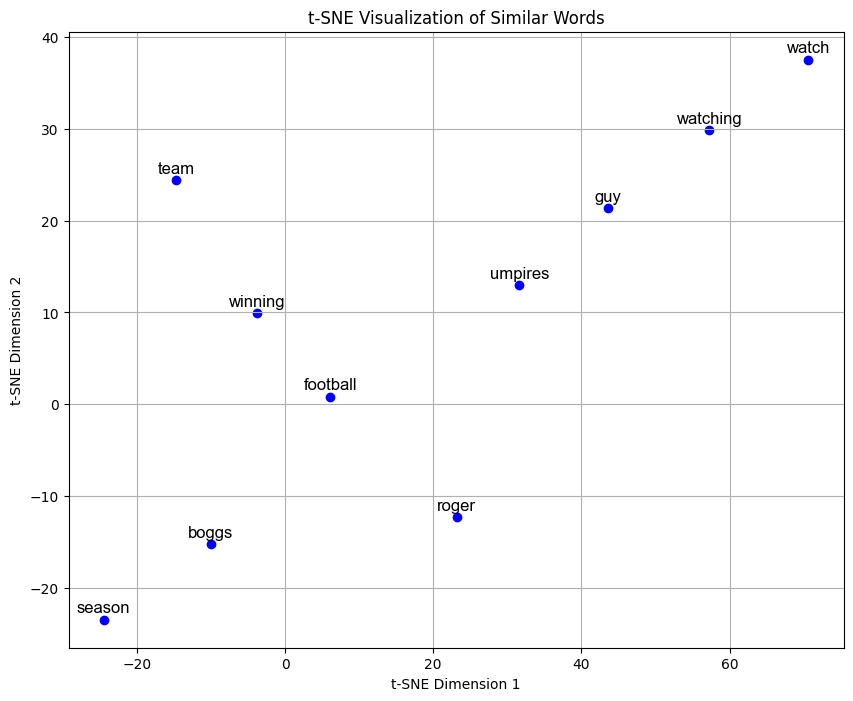

In [41]:
# Visualizing the most similar words using t-sne and sactterplot
# Get vectors and words
words = [word for word, _ in sim_words_doc2vec]
word_vectors = [model_doc2vec.wv[word] for word in words]
word_vectors = np.array(word_vectors)


# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=2, init='pca', random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o', c='b')

# Annotate points with word labels
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12, textcoords='offset points', 
                 xytext=(0,5), ha='center', fontproperties='Arial', family='Arial')
    

plt.title(f"t-SNE Visualization of Similar Words")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

In [42]:
# Odd-One-Out
lst_exmaple = ['ball', 'ground', 'car']
model_doc2vec.wv.doesnt_match(lst_exmaple)

'car'

In [43]:
# Analogy
model_doc2vec.wv.most_similar(positive=['baseball', 'ground'], negative =['player'])

[('paid', 0.8448402285575867),
 ('gone', 0.832281768321991),
 ('dream', 0.8309165239334106),
 ('admit', 0.8303231596946716),
 ('taking', 0.8282305598258972),
 ('friends', 0.8267221450805664),
 ('kids', 0.8253180384635925),
 ('lose', 0.8242747187614441),
 ('silly', 0.8139263987541199),
 ('saw', 0.81387859582901)]

* `1. Train a classifier`

In [44]:
# Linear SVC
clf = LinearSVC()
clf.fit(X_train_doc2vec, y_train)

y_pred_test = clf.predict(X_test_doc2vec)

In [45]:
# Report
print(classification_report(y_test, y_pred_test))

                        precision    recall  f1-score   support

        comp.windows.x       0.99      0.91      0.95        79
             rec.autos       0.83      0.90      0.86        79
    rec.sport.baseball       0.90      0.93      0.91        80
soc.religion.christian       0.94      0.90      0.92        80

              accuracy                           0.91       318
             macro avg       0.91      0.91      0.91       318
          weighted avg       0.91      0.91      0.91       318



In [46]:
accuracy_score(y_test, y_pred_test)  # of a classifier

0.9088050314465409

* `2. Using Cosine Similarity Get Top Similar (as we did before)`

In [47]:
for i in random.choices(range(0, len(X_test)), k=5):
    print(f"ID: {i}")
    print("True label:", colored(y_test[i], 'green'))
    distances = cosine_similarity(X_test_doc2vec[i].reshape(1, EMBED_SIZE), X_train_doc2vec).flatten()
    indices = np.argsort(distances)[::-1]
    for _, j in enumerate(indices[:3]):
        print(f"{_} nearest label is {colored(y_train[j], 'green' if y_train[j]==y_test[i] else 'red')}",
             f"similarity: {colored(round(distances[j], 3), 'yellow')}")

ID: 32
True label: soc.religion.christian
0 nearest label is soc.religion.christian similarity: 0.81
1 nearest label is soc.religion.christian similarity: 0.808
2 nearest label is soc.religion.christian similarity: 0.805
ID: 117
True label: comp.windows.x
0 nearest label is rec.sport.baseball similarity: 0.705
1 nearest label is rec.sport.baseball similarity: 0.681
2 nearest label is soc.religion.christian similarity: 0.659
ID: 181
True label: soc.religion.christian
0 nearest label is soc.religion.christian similarity: 0.827
1 nearest label is soc.religion.christian similarity: 0.812
2 nearest label is soc.religion.christian similarity: 0.794
ID: 94
True label: comp.windows.x
0 nearest label is comp.windows.x similarity: 0.872
1 nearest label is comp.windows.x similarity: 0.87
2 nearest label is comp.windows.x similarity: 0.862
ID: 211
True label: comp.windows.x
0 nearest label is comp.windows.x similarity: 0.897
1 nearest label is comp.windows.x similarity: 0.892
2 nearest label is co

In [48]:
# List to append in it the predicted of test labels
y_pred_test = []

# Loop over the entire test dataset
for i in range(len(X_test)):
    # Compute cosine similarity between the test instance and all training instances
    distances = cosine_similarity(X_test_doc2vec[i].reshape(1, EMBED_SIZE), X_train_doc2vec).flatten()
    # Get the indices of the training instances sorted by similarity in descending order
    indices = np.argsort(distances)[::-1]
    # Get the labels of the three nearest neighbors
    nearest_labels = [y_train[j] for j in indices[:3]]
    # Determine the most common label among the three nearest neighbors
    y_pred_each = Counter(nearest_labels).most_common(1)[0][0]
    # Append to list
    y_pred_test.append(y_pred_each)

# Get Accuracy score
acc = accuracy_score(y_test, y_pred_test)
print(f'Acccuray Score using cosine simlarity is: {acc*100:.3f} %') # using cosine similarity as a metric

Acccuray Score using cosine simlarity is: 86.164 %


---

* `3. Using Euclidean Distance for measuring similarity`

In [49]:
for i in random.choices(range(0, len(X_test)), k=5):
    print(f"ID: {i}")
    print("True label:", colored(y_test[i], 'green'))
    distances = euclidean_distances(X_test_doc2vec[i].reshape(1, EMBED_SIZE), X_train_doc2vec).flatten() 
    indices = np.argsort(distances)
    for _, j in enumerate(indices[:3]):
        print(f"{_} nearest label is {colored(y_train[j], 'green' if y_train[j]==y_test[i] else 'red')}",
             f"similarity: {colored(round(distances[j], 3), 'yellow')}")

ID: 230
True label: rec.sport.baseball
0 nearest label is rec.sport.baseball similarity: 1.636
1 nearest label is rec.sport.baseball similarity: 1.652
2 nearest label is rec.sport.baseball similarity: 1.697
ID: 185
True label: rec.sport.baseball
0 nearest label is rec.sport.baseball similarity: 0.586
1 nearest label is rec.sport.baseball similarity: 0.599
2 nearest label is rec.sport.baseball similarity: 0.673
ID: 229
True label: comp.windows.x
0 nearest label is rec.sport.baseball similarity: 0.371
1 nearest label is rec.sport.baseball similarity: 0.382
2 nearest label is rec.sport.baseball similarity: 0.397
ID: 132
True label: rec.sport.baseball
0 nearest label is rec.sport.baseball similarity: 1.462
1 nearest label is rec.sport.baseball similarity: 1.474
2 nearest label is rec.sport.baseball similarity: 1.54
ID: 198
True label: comp.windows.x
0 nearest label is comp.windows.x similarity: 0.867
1 nearest label is comp.windows.x similarity: 0.927
2 nearest label is comp.windows.x simi

In [50]:
# List to append in it the predicted of test labels
y_pred_test = []

# Loop over the entire test dataset
for i in range(len(X_test)):
  
    # Compute euclidean_distances between the test instance and all training instances
    distances = euclidean_distances(X_test_doc2vec[i].reshape(1, EMBED_SIZE), X_train_doc2vec).flatten() 
    # Get the indices of the training instances sorted by distance in ascending order
    indices = np.argsort(distances)
    # Get the labels of the three nearest neighbors
    nearest_labels = [y_train[j] for j in indices[:3]]
    # Determine the most common label among the three nearest neighbors
    y_pred_each = Counter(nearest_labels).most_common(1)[0][0]
    # Append to list
    y_pred_test.append(y_pred_each)

# Get Accuracy score
acc = accuracy_score(y_test, y_pred_test)
print(f'Acccuray Score using Euclidean Distance is: {acc*100:.3f} %') # usign euclidean distance

Acccuray Score using Euclidean Distance is: 85.535 %


----